# Analyse des résultats

Importation des librairies nécessaires (pandas: importer et gérer des tableaux de données, seaborn et matplotlib pour les graphiques)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

Fonctions


In [2]:
def create_df(string_location_file, string_file_name, sheet_name):
    df_testType = pd.read_excel(string_location_file + string_file_name, sheet_name=sheet_name,skiprows=2)
    return df_testType

def import_data_from_excel(string_location_file, string_file_name):
    dico_df={}
    for test_type in ["Action","4_words","list","3_infos"]:
        dico_df[test_type]=create_df(string_location_file, string_file_name, test_type)
    return dico_df

def calculatePercentage(df, column, valueToCount, totalForPercentage):
    occurenceValueToCountInCol = len(df[df[column].isin([valueToCount])])
    percent=occurenceValueToCountInCol*100/totalForPercentage
    return percent

def savePercentage (df_whereSaved, columnCritere, valueCritere, df_percent, columnPercent, valueToCount, totalForPercentage, nameNewCol):
    float_percent = calculatePercentage(df_percent, columnPercent, valueToCount, totalForPercentage)
    df_whereSaved.loc[ (df_whereSaved[columnCritere]==valueCritere), nameNewCol] = float_percent
    return

def createTemporaryDf(df_input,string_colCritere1, valueCritere1, string_colCritere2, valueCritere21, valueCritere22, critere2=False):
    lst_df_temp=[]

    df_temp1=df_input[df_input[string_colCritere1]==valueCritere1]
    lst_df_temp.append(df_temp1)

    if critere2:
        df_temp21=df_temp1[df_temp1[string_colCritere2]==valueCritere21]
        df_temp22=df_temp1[df_temp1[string_colCritere2]==valueCritere22]
        lst_df_temp.append(df_temp21)
        lst_df_temp.append(df_temp22)

    return lst_df_temp

def savePercentage (df_whereSaved, string_col1, valueCol1, string_col2, valueCol2, string_nameNewCol, float_percent):
    df_whereSaved.loc[ (df_whereSaved[string_col1]==valueCol1) & (df_whereSaved[string_col2]==valueCol2),string_nameNewCol] = float_percent
    return

Initialisation: variables globale (temporaires, à supprimer dès que possible) et chemin d'acces au fichier.

In [3]:
#location=
file_name="Tests results.xlsx"
nbVideos=9
nbRep=5

Importation des données dans des data frame et formatage pour être facilement utilisées.

In [ ]:
#dico_df=import_data_from_excel("C:/Users/camil/Documents/PERSO/COURS/H-KA/COURS/MechaSysteme/Project/", "Tests results.xlsx")
dico_df=import_data_from_excel("/Users/mariewinkler/Downloads/", "Tests results.xlsx")
df_action=dico_df["Action"]
df_action["test_type"]="Action"

df_4Words=dico_df["4_words"]
df_4Words["test_type"]="4Words"

df_list=dico_df["list"]
df_list["test_type"]="List"

df_3Infos=dico_df["3_infos"]
df_3Infos["test_type"]="3Infos"

df_poe=pd.concat([df_action[df_action["LLM"]=="Poe"],df_4Words[df_4Words["LLM"]=="Poe"],
                 df_list[df_list["LLM"]=="Poe"],df_3Infos[df_3Infos["LLM"]=="Poe"]],join="inner", ignore_index=True)
df_hf=pd.concat([df_action[df_action["LLM"]=="Hugging Faces"],df_4Words[df_4Words["LLM"]=="Hugging Faces"],
                 df_list[df_list["LLM"]=="Hugging Faces"],df_3Infos[df_3Infos["LLM"]=="Hugging Faces"]],join="inner", ignore_index=True)

Lignes de code pour tracer les graphiques. Une erreur et de toute façon, la présentation est moche. Il faut faire des fonctions.

    Test            LLM  Video  \
0      1            Poe      1   
1      1  Hugging Faces      1   
2      1            Poe      5   
3      1  Hugging Faces      5   
4      1            Poe     10   
..   ...            ...    ...   
85     5  Hugging Faces     28   
86     5            Poe     32   
87     5  Hugging Faces     32   
88     5            Poe      7   
89     5  Hugging Faces      7   

                                               Answer Action ok?  \
0   The person in the video is walking across a pa...        Yes   
1   The video shows a park-like setting. There are...        Yes   
2   The person in this video is walking from left ...         No   
3   Setting: The video is shot outdoors, in a plac...         No   
4   The person in the video is jogging along a sid...        Yes   
..                                                ...        ...   
85  The person is tripping and falling on the ground.        Yes   
86  The person in the video is jogging or runni

KeyError: 'Test'

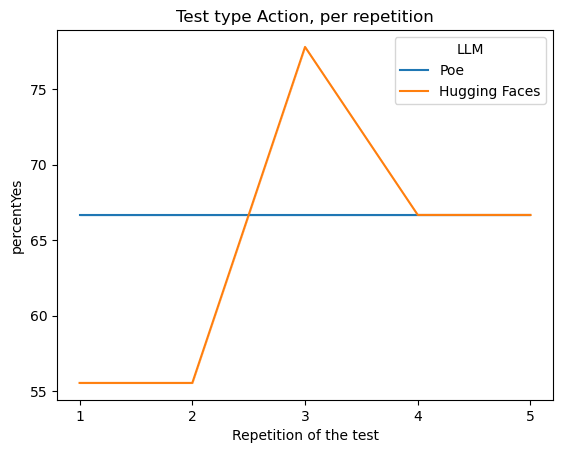

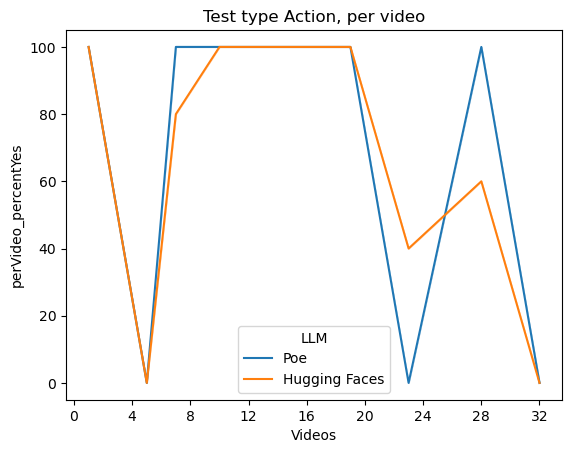

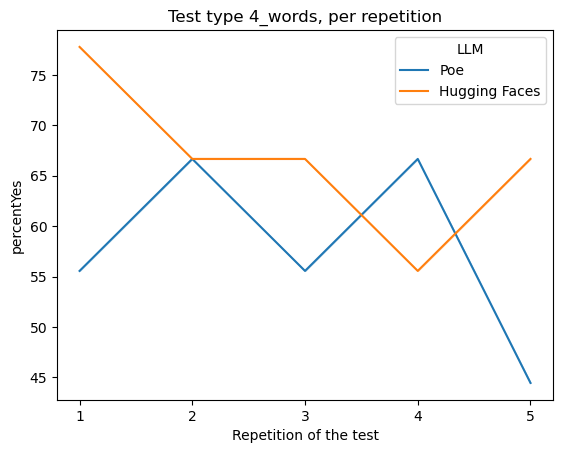

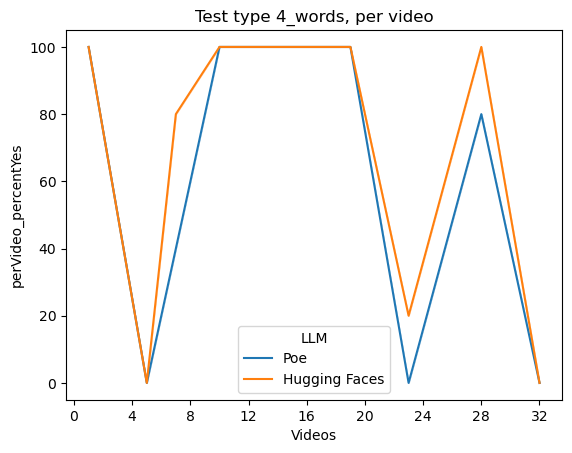

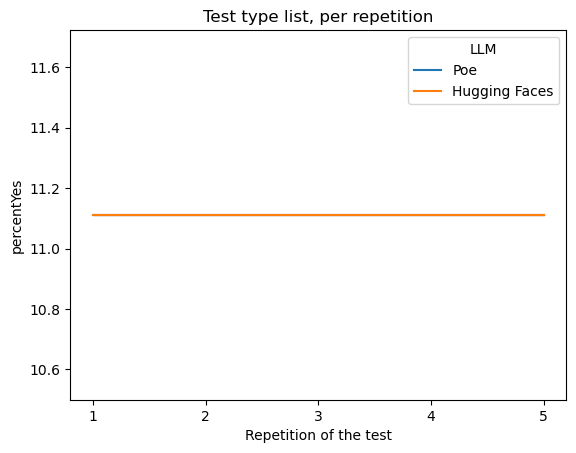

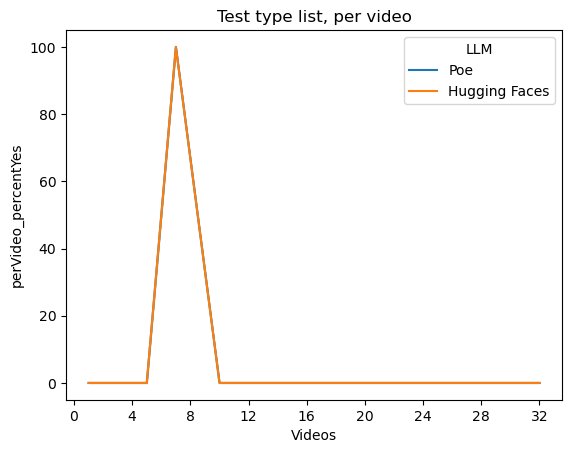

In [5]:
i=0
for test_type in list(dico_df.keys()):
    df_test = dico_df[test_type]
    print(df_test)
    name=list(dico_df.keys())[i]

    for rep in range(1,6):
        lst=createTemporaryDf(df_test,"Test",rep,"LLM","Poe","Hugging Faces", critere2=True)

        percentPoe = calculatePercentage(lst[1],'Action ok?', "Yes", nbVideos)
        percentHF = calculatePercentage(lst[2],'Action ok?', "Yes", nbVideos)

        savePercentage (df_test,"Test",rep,"LLM", "Poe", "percentYes", percentPoe)
        savePercentage (df_test,"Test",rep,"LLM", "Hugging Faces", "percentYes", percentHF)

    plt.figure()
    plt.title("Test type {}, per repetition".format(name))
    sns.lineplot(data=df_test, x="Test", y="percentYes", hue="LLM")
    ax=plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    plt.xlabel("Repetition of the test")

    for video in df_test["Video"].unique():
        lst=createTemporaryDf(df_test,"Video",video,"LLM","Poe","Hugging Faces", critere2=True)

        percentPoe = calculatePercentage(lst[1],'Action ok?', "Yes", nbRep)
        percentHF = calculatePercentage(lst[2],'Action ok?', "Yes", nbRep)

        savePercentage (df_test,"Video",video,"LLM", "Poe", "perVideo_percentYes", percentPoe)
        savePercentage (df_test,"Video",video,"LLM", "Hugging Faces", "perVideo_percentYes", percentHF)

    plt.figure()
    plt.title("Test type {}, per video".format(name))
    sns.lineplot(data=df_test, x="Video", y="perVideo_percentYes", hue="LLM")
    ax=plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(4))
    plt.xlabel("Videos")

    i+=1


Brouillon


In [ ]:
# def prepareDf(df_testType, x, y, hue, perRep=True, perVideo=False):
#     lst_rep=[k for k in range(1,6)]
#     lst_Video=df_testType["Video"].unique()

#     if perRep:
#         for rep in lst_rep:
#             lst_tempDF=createTemporaryDf(df_testType,"Test",rep,"LLM","Poe","Hugging Faces", critere2=True)

#             percentPoe = calculatePercentage(lst_tempDF[1],'Action ok?', "Yes", nbVideos)
#             percentHF = calculatePercentage(lst_tempDF[2],'Action ok?', "Yes", nbVideos)

#             savePercentage (df_action,"Test",rep,"LLM", "Poe", "percentYes", percentPoe)
#             savePercentage (df_action,"Test",rep,"LLM", "Hugging Faces", "percentYes", percentHF)

#     return

# df_byrep = df_action[df_action["Test"]==rep]
    # df_byrep_bypoe=df_byrep[df_byrep["LLM"]=="Poe"]
    # df_byrep_byhf=df_byrep[df_byrep["LLM"]=="Hugging Faces"]
    # occurencepoeYes = len(df_byrep_bypoe[df_byrep_bypoe['Action ok?'].isin(["Yes"])])
    # occurencehfYes = len(df_byrep_byhf[df_byrep_byhf['Action ok?'].isin(["Yes"])])
    # print(occurencepoeYes)
    # print(occurencehfYes)
    # df_action.loc[ (df_action["Test"]==rep) & (df_action["LLM"]=="Poe"),"occurenceYes"] = occurencepoeYes
    # df_action.loc[ (df_action["Test"]==rep) & (df_action["LLM"]=="Hugging Faces"),"occurenceYes"] = occurencehfYes